In [23]:
## Read CSV file
import pandas as pd
import numpy as np
recipe = pd.read_csv('user_recipe1.csv')
source = pd.read_csv('recipe_source1.csv')

In [24]:
## Prepare dataset format for Word2vec model
recipe.columns = ['user','recipe']
source.columns = ['recipe','source']
df = pd.merge(recipe, source, how='inner', on=['recipe', 'recipe'])
df['recipe']=df["recipe"].astype(str)
df['source']=df["source"].astype(str)
df_source = df.groupby("user").apply(lambda order: order['source'].tolist())
sentences = df_source
max1 = 0
for i in sentences:
    if len(i) > max1:
        max1 = len(i)

In [25]:
## Word2vec Train
import gensim
model = gensim.models.Word2Vec(sentences, size=500, window=max1, min_count=2, workers=4)
vocab = list(model.wv.vocab)
X = model[vocab]
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df1 = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df1.columns = ['x', 'y', 'word']

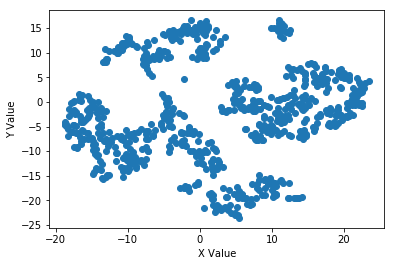

In [26]:
## Ingredient map
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('X Value')
plt.ylabel('Y Value')
ax.scatter(df1['x'], df1['y'])
plt.show()
fig.savefig('Ingredient map.png')
plt.close(fig)

In [27]:
## Match the name for gredient map
recipe_name = pd.read_csv('recipe_name1.csv')
source_name = pd.read_csv('source_name_en1.csv')
source_name = source_name.drop_duplicates()
recipe_name = recipe_name.drop_duplicates()
source_name1 = source_name.drop_duplicates()
source_name1.source_id = source_name1.source_id.astype(str)
df2 = df1.merge(source_name1, left_on='word', right_on='source_id', how='inner')

In [42]:
df2[df2.source_name == 'cream']

,x,y,word,source_id,source_name
49,11.395166,15.752931,5296,5296,cream


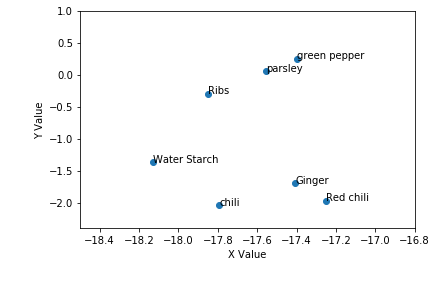

In [41]:
## Plot part of gredient map
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df2['x'], df2['y'])
for i, txt in enumerate(df2['source_name']):
    ax.annotate(txt, (df2['x'].iloc[i], df2['y'].iloc[i]))
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.xlim(-18.5,-16.8)
plt.ylim(-2.4,1)
plt.show()
fig.savefig('Ingredient map part1.png')
plt.close(fig)


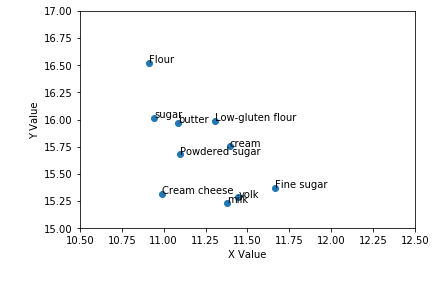

In [45]:
## Plot part of gredient map
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df2['x'], df2['y'])
for i, txt in enumerate(df2['source_name']):
    ax.annotate(txt, (df2['x'].iloc[i], df2['y'].iloc[i]))
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.xlim(10.5,12.5)
plt.ylim(15,17)
plt.show()
fig.savefig('Ingredient map part2.png')
plt.close(fig)

In [46]:
## Prepare dataset for recipe map
source.source = source.source.astype(str)
df3 = source.merge(df2, left_on='source', right_on='word', how='inner')
df4 = df3.sort_values('recipe')
del df4['word']
del df4['source']
df4 = df4.drop_duplicates(["recipe", "source_id"])
recipe_list = list(df4.recipe.unique())

In [47]:
## recipe map function

import numpy as np
import operator
recipe_result = []
x_result = []
y_result = []
for i in recipe_list:
    recipe_length = df4[df4['recipe'] == i].shape[0]
    distance_list = []
    distance_sum1 = []
    for j in range(recipe_length):
        x = (df4[df4['recipe'] == i].iloc[j,:][1])
        y = (df4[df4['recipe'] == i].iloc[j,:][2])
        distance_list.append(np.array((x,y)))
    for j in range(recipe_length):
        distance_sum = 0
        for k in range(recipe_length):
            distance_sum = distance_sum + np.linalg.norm(distance_list[j] - distance_list[k])   
        distance_sum1.append(distance_sum)
    min_index = min(enumerate(distance_sum1), key=operator.itemgetter(1))[0]
    recipe_result.append(i)
    x_result.append((df4[df4['recipe'] == i].iloc[min_index,:][1]))
    y_result.append((df4[df4['recipe'] == i].iloc[min_index,:][2]))  
    
recipe_map = pd.DataFrame(
    {'recipe': recipe_result,
     'x': x_result,
     'y': y_result
    })

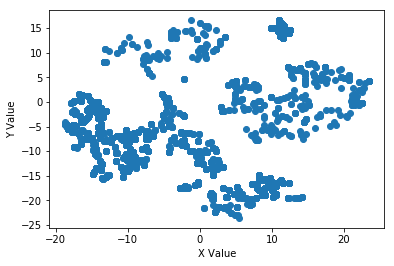

In [48]:
## plot recipe map
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(recipe_map['x'], recipe_map['y'])
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
fig.savefig('Recipe map.png')
plt.close(fig)

In [170]:
# Input of the application
key = 102820205

In [171]:
i = key
recipe_result1 = []
x_result1 = []
y_result1 = []
recipe_length = df4[df4['recipe'] == i].shape[0]
distance_list = []
distance_sum1 = []
for j in range(recipe_length):
    x = (df4[df4['recipe'] == i].iloc[j,:][1])
    y = (df4[df4['recipe'] == i].iloc[j,:][2])
    distance_list.append(np.array((x,y)))
for j in range(recipe_length):
    distance_sum = 0
    for k in range(recipe_length):
        distance_sum = distance_sum + np.linalg.norm(distance_list[j] - distance_list[k]) 
    distance_sum1.append(distance_sum)
min_index = min(enumerate(distance_sum1), key=operator.itemgetter(1))[0]
recipe_result1.append(i)
x_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][1]))
y_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][2]))

test_map = pd.DataFrame(
    {'recipe': recipe_result1,
     'x': x_result1,
     'y': y_result1
    })

distance_list = []
for i in range(recipe_map.shape[0]):
    x = recipe_map.iloc[i,:][1]
    y = recipe_map.iloc[i,:][2]
    distance_list.append(np.array((x,y)))
    
test = np.array((x_result1,y_result1))
test_index = []
for i in range(len(distance_list)):
    if distance_list[i][0] == x_result1[0]:
        if distance_list[i][1] == y_result1[0]:
            test_index.append(i)
            
count_index = {}
for i in test_index:
    count = 0
    id = int(recipe_map.iloc[i,:][0])
    recipe_list = list(df4[df4.recipe == id].source_id)
    recipe_result_list = list(df4[df4.recipe == recipe_result1[0]].source_id)
    for j in recipe_list:
        if j in recipe_result_list:
            count = count + 1
    count_index[id] = count/len(recipe_result_list)
del count_index[key] 

result_index = max(count_index.keys(), key=(lambda k: count_index[k])) 
Accuracy = float(count_index[result_index])

recipe_name[recipe_name['recipe_id'] == key]
input1 = recipe_name[recipe_name['recipe_id'] == key].iloc[0,:][1]

recipe_name[recipe_name['recipe_id'] == result_index]
output = recipe_name[recipe_name['recipe_id'] == result_index].iloc[0,:][1]

print('Input: %s, Recommendation Recipe: %s, Matched-Degree: %.2f' % (input1, output, Accuracy))

Input: 南瓜圈圈包, Recommendation Recipe: 软萌黄金南瓜面包卷, Matched-Degree: 0.86


In [193]:
# Recipe of recommended recipe
df4[df4['Recipe ID'] == key]

,Recipe ID,X Value,Y Value,Ingredient ID,Ingredient Name
45589,255659,6.327957,12.466845,5328,Lemon dander
33497,255659,11.983056,-17.304299,1282,Low-gluten flour
45526,255659,16.409744,-12.827076,5388,Total protein
21173,255659,6.342282,9.384372,2004,mint
30936,255659,16.399528,-12.773962,2257,corn starch
25023,255659,11.782751,-16.657982,2054,Fine sugar
35948,255659,11.930088,-16.762750,25,yolk
47059,255659,12.175621,14.150420,1539,Soft white sugar
32025,255659,12.366416,-15.756304,4088,Egg white
2869,255659,14.428119,-15.455369,2438,water


In [185]:
# Recipe of recommended recipe
df4[df4['Recipe ID'] == result_index]

,Recipe ID,X Value,Y Value,Ingredient ID,Ingredient Name
30128,1011870,11.715966,-17.116970,5296,cream
35814,1011870,11.930088,-16.762750,25,yolk
28469,1011870,12.648132,-17.457490,1871,butter
45496,1011870,16.409744,-12.827076,5388,Total protein
13664,1011870,11.978942,-16.854097,2316,milk
1061,1011870,2.207968,9.526678,2073,sugar
2444,1011870,14.428119,-15.455369,2438,water
31898,1011870,12.366416,-15.756304,4088,Egg white
45972,1011870,6.153229,13.636343,1855,coffee powder
36261,1011870,2.334445,14.262520,2371,maltose


In [175]:
# Test matched accuracy
final_test = list(recipe_map.iloc[:,0][0:1000])
final_count = 0
empty = 0
for key in final_test:
    i = key
    recipe_result1 = []
    x_result1 = []
    y_result1 = []
    recipe_length = df4[df4['recipe'] == i].shape[0]
    distance_list = []
    distance_sum1 = []
    for j in range(recipe_length):
        x = (df4[df4['recipe'] == i].iloc[j,:][1])
        y = (df4[df4['recipe'] == i].iloc[j,:][2])
        distance_list.append(np.array((x,y)))
    for j in range(recipe_length):
        distance_sum = 0
        for k in range(recipe_length):
            distance_sum = distance_sum + np.linalg.norm(distance_list[j] - distance_list[k])
        distance_sum1.append(distance_sum)
    min_index = min(enumerate(distance_sum1), key=operator.itemgetter(1))[0]
    recipe_result1.append(i)
    x_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][1]))
    y_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][2]))

    test_map = pd.DataFrame(
        {'recipe': recipe_result1,
         'x': x_result1,
         'y': y_result1
        })

    distance_list = []
    for i in range(recipe_map.shape[0]):
        x = recipe_map.iloc[i,:][1]
        y = recipe_map.iloc[i,:][2]
        distance_list.append(np.array((x,y)))
    
    test = np.array((x_result1,y_result1))
    test_index = []
    for i in range(len(distance_list)):
        if distance_list[i][0] == x_result1[0]:
            if distance_list[i][1] == y_result1[0]:
                test_index.append(i)
            
    count_index = {}
    for i in test_index:
        count = 0
        id = int(recipe_map.iloc[i,:][0])
        recipe_list = list(df4[df4.recipe == id].source_id)
        recipe_result_list = list(df4[df4.recipe == recipe_result1[0]].source_id)
        for j in recipe_list:
            if j in recipe_result_list:
                count = count + 1
        count_index[id] = count/len(recipe_result_list)
    del count_index[key] 
    
    if len(count_index) == 0:
        empty = empty + 1
        continue
    else:
        result_index = max(count_index.keys(), key=(lambda k: count_index[k])) 
        Accuracy = float(count_index[result_index])
        final_count = Accuracy + final_count

print('Test Accuracy: %.2f' % (final_count/(len(final_test)-empty)))

Test Accuracy: 0.64


In [36]:
## Cross Validation Test Accuracy
import random
import numpy as np
import operator
Final_Accruacy = []
for t in range(10):
    ## Train Model
    recipe_list = list(df4.recipe.unique())
    recipe_list1 = random.sample(recipe_list, 100)
    for o in recipe_list1:
        recipe_list.remove(o)
    recipe_result = []
    x_result = []
    y_result = []
    for i in recipe_list:
        recipe_length = df4[df4['recipe'] == i].shape[0]
        distance_list = []
        distance_sum1 = []
        for j in range(recipe_length):
            x = (df4[df4['recipe'] == i].iloc[j,:][1])
            y = (df4[df4['recipe'] == i].iloc[j,:][2])
            distance_list.append(np.array((x,y)))
        for j in range(recipe_length):
            distance_sum = 0
            for k in range(recipe_length):
                distance_sum = distance_sum + np.linalg.norm(distance_list[j] - distance_list[k])   
            distance_sum1.append(distance_sum)
        min_index = min(enumerate(distance_sum1), key=operator.itemgetter(1))[0]
        recipe_result.append(i)
        x_result.append((df4[df4['recipe'] == i].iloc[min_index,:][1]))
        y_result.append((df4[df4['recipe'] == i].iloc[min_index,:][2]))  
    recipe_map = pd.DataFrame(
        {'recipe': recipe_result,
         'x': x_result,
         'y': y_result
        })
    
    ## Test Model
    final_test = recipe_list1
    final_count = 0
    empty = 0
    for key in final_test:
        i = key
        recipe_result1 = []
        x_result1 = []
        y_result1 = []
        recipe_length = df4[df4['recipe'] == i].shape[0]
        distance_list = []
        distance_sum1 = []
        for j in range(recipe_length):
            x = (df4[df4['recipe'] == i].iloc[j,:][1])
            y = (df4[df4['recipe'] == i].iloc[j,:][2])
            distance_list.append(np.array((x,y)))
        for j in range(recipe_length):
            distance_sum = 0
            for k in range(recipe_length):
                distance_sum = distance_sum + np.linalg.norm(distance_list[j] - distance_list[k])
            distance_sum1.append(distance_sum)
        min_index = min(enumerate(distance_sum1), key=operator.itemgetter(1))[0]
        recipe_result1.append(i)
        x_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][1]))
        y_result1.append((df4[df4['recipe'] == i].iloc[min_index,:][2]))

        test_map = pd.DataFrame(
            {'recipe': recipe_result1,
             'x': x_result1,
             'y': y_result1
            })

        distance_list = []
        for i in range(recipe_map.shape[0]):
            x = recipe_map.iloc[i,:][1]
            y = recipe_map.iloc[i,:][2]
            distance_list.append(np.array((x,y)))
    
        test = np.array((x_result1,y_result1))
        test_index = []
        for i in range(len(distance_list)):
            if distance_list[i][0] == x_result1[0]:
                if distance_list[i][1] == y_result1[0]:
                    test_index.append(i)
            
        count_index = {}
        for i in test_index:
            count = 0
            id = int(recipe_map.iloc[i,:][0])
            recipe_list = list(df4[df4.recipe == id].source_id)
            recipe_result_list = list(df4[df4.recipe == recipe_result1[0]].source_id)
            for j in recipe_list:
                if j in recipe_result_list:
                    count = count + 1
            count_index[id] = count/len(recipe_result_list)
    
        if len(count_index) == 0:
            empty = empty + 1
            continue
        else:
            result_index = max(count_index.keys(), key=(lambda k: count_index[k])) 
            Accuracy = float(count_index[result_index])
            final_count = Accuracy + final_count
    Final_Accruacy.append(final_count/(len(final_test)-empty))

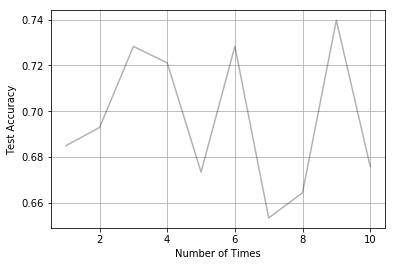

In [81]:
# Test Accuracy plot
x = np.arange(1,11)
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,Final_Accruacy, color='k', alpha=0.3, rasterized=True)
plt.xlabel("Number of Times")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()
fig.savefig('Accuracy.png')
plt.close(fig)